In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [2]:
df= pd.read_csv('C:/Users/USER/Desktop/blossom academy/Assignments/Mini project/superstore data.csv', parse_dates = ['Order Date','Ship Date'], encoding='latin-1')

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [4]:
df.shape #numer of instances and fields(columns)

(51290, 24)

In [5]:
df.columns #quick glance at the columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
for col in df.columns:  #print the column names
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [7]:
df.info() #datatype information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## Checking for null/missing values

In [8]:
#This will indicate True or false for columns with null values
df.isna().any()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [9]:
#Using SUM will indicate amount of null vaolues if it exists
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

## Drop column postal Code

There is a lot of missing values in the Postal Code column, so its best its dropped to have a clean Data

In [10]:
df["Postal Code"].shape #reviewed the amount of instances in the column 

(51290,)

In [11]:
df.drop("Postal Code",axis = 1,inplace = True) #drop postal code column 

In [12]:
df.head() #confirm if it has been dropped

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [19]:
len(df.columns)   #number of columns present 

23

In [20]:
#selecting colums that have numerical variables
num_data_var = df.select_dtypes(exclude='object')
print("The number of numerical variables: ", len(num_data_var.columns))

The number of numerical variables:  8


In [21]:
#df.describe(exclude = "object")
df.describe() #statistical summary of numerical fields of data except date

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## Explore through the different categories of categorical data

In [22]:
#Getting the columns categorical variables
cat_data_var = df.select_dtypes(exclude="number")
print("The number of categorical variables: ", len(cat_data_var.columns))

The number of categorical variables:  17


In [23]:
cat_data_var.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",Medium
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",Medium
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",High
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",High
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",Medium


In [24]:
# Check the different categories in the categorical variables

print(df['Ship Mode'].unique())
df['Ship Mode'].value_counts()

['Standard Class' 'Second Class' 'First Class' 'Same Day']


Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [25]:
print(df['Segment'].unique())
df['Segment'].value_counts()

['Consumer' 'Home Office' 'Corporate']


Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [26]:
print(df['Market'].unique())
df['Market'].value_counts()

['Africa' 'APAC' 'EMEA' 'EU' 'US' 'LATAM' 'Canada']


APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [27]:
print(df['Category'].unique())

df['Category'].value_counts()

['Office Supplies' 'Furniture' 'Technology']


Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [28]:
print(df['Sub-Category'].unique())
df['Sub-Category'].value_counts()

['Storage' 'Supplies' 'Paper' 'Furnishings' 'Copiers' 'Bookcases'
 'Appliances' 'Art' 'Accessories' 'Binders' 'Labels' 'Envelopes' 'Chairs'
 'Machines' 'Tables' 'Phones' 'Fasteners']


Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [29]:
print(df['Region'].unique())
df['Region'].value_counts()

['Africa' 'Oceania' 'EMEA' 'North' 'Central Asia' 'West' 'North Asia'
 'Central' 'South' 'Canada' 'Southeast Asia' 'East' 'Caribbean']


Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [30]:
print(df['Order Priority'].unique())
df['Order Priority'].value_counts()

['Medium' 'High' 'Critical' 'Low']


Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

## Create new columns

In [31]:
# Creating a new column for Unit Price, Year, Month, Interval

#df['Unit Price'] = df['Sales']/df['Quantity']
#df['Month'] = pd.DatetimeIndex(df['Order Date']).month
#df['Year'] = pd.DatetimeIndex(df['Order Date']).year
#df['Order Interval'] = (df['Ship Date'] - df['Order Date'])/np.timedelta64(1, 'D')

#Extracting the Order year
df['Order_Year'] = (pd.to_datetime(df["Order Date"])).dt.year

#Extracting the Order month in string(abrv) and adding it as a data column
df["Order_Month"] = (pd.to_datetime(df["Order Date"])).dt.month_name().str[:3]

# Extracting the Ship year
df['Ship_Year'] = (pd.to_datetime(df["Ship Date"])).dt.year

#Extracting the shipping month
df["Ship_Month"] = (pd.to_datetime(df["Ship Date"])).dt.month_name().str[:3]

#Extracting a colunm for Shipping interval in days using the difference between order date and shipping date
df["Shipping_interval"] = pd.to_datetime(df["Ship Date"]) - pd.to_datetime(df["Order Date"])

#converting shipping_interval data type into integers
df["Shipping_interval"] = (df["Shipping_interval"]/ np.timedelta64(1,'D')).astype(int)

#Create column for Unit price (sale/quantity)
df["Unit price"] = df["Sales"]/df["Quantity"]

In [32]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Year,Order_Month,Ship_Year,Ship_Month,Shipping_interval,Unit price
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,2011,Jan,2011,Jun,151,204.15


In [34]:
#checking unique values for each column
for x in range(len(df.columns)):
    print(f"Values for \"{df.columns[x]}\"")
    print(df[df.columns[x]].value_counts())
    
    print("\n")

Values for "Row ID"
42433    1
9465     1
2645     1
24695    1
32089    1
        ..
40262    1
16653    1
2963     1
16652    1
36388    1
Name: Row ID, Length: 51290, dtype: int64


Values for "Order ID"
CA-2014-100111     14
NI-2014-8880       13
TO-2014-9950       13
IN-2012-41261      13
IN-2013-42311      13
                   ..
ID-2014-43494       1
ES-2014-2638373     1
IT-2014-1612191     1
PL-2014-9180        1
CA-2014-156720      1
Name: Order ID, Length: 25035, dtype: int64


Values for "Order Date"
2014-06-18    135
2014-11-18    127
2014-03-09    126
2014-11-20    118
2014-12-29    116
             ... 
2013-07-07      1
2011-01-16      1
2012-09-23      1
2013-07-21      1
2013-10-11      1
Name: Order Date, Length: 1430, dtype: int64


Values for "Ship Date"
2014-11-22    130
2014-07-09    115
2014-11-17    101
2014-07-12    101
2014-11-29    100
             ... 
2013-03-21      3
2011-04-14      3
2011-03-01      2
2011-05-01      2
2011-06-01      2
Name: Ship Date

In [35]:
# droping row id
df.drop("Row ID",axis = 1,inplace = True)
#new_num_data = num_data_var.drop("Row ID",axis = 1)

In [36]:
# Take the descritive statistics for the numerical variables (numerical columns alone)
df.describe(include = np.number)

,Sales,Quantity,Discount,Profit,Shipping Cost,Order_Year,Ship_Year,Shipping_interval,Unit price
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,2012.792728,5.079041,71.657487
std,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,1.105303,97.771493,113.581515
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,2011.000000,-322.000000,0.336000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,2012.000000,1.000000,11.799900
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,2013.000000,4.000000,29.400000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,2014.000000,59.000000,82.160000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,2015.000000,214.000000,3773.080000


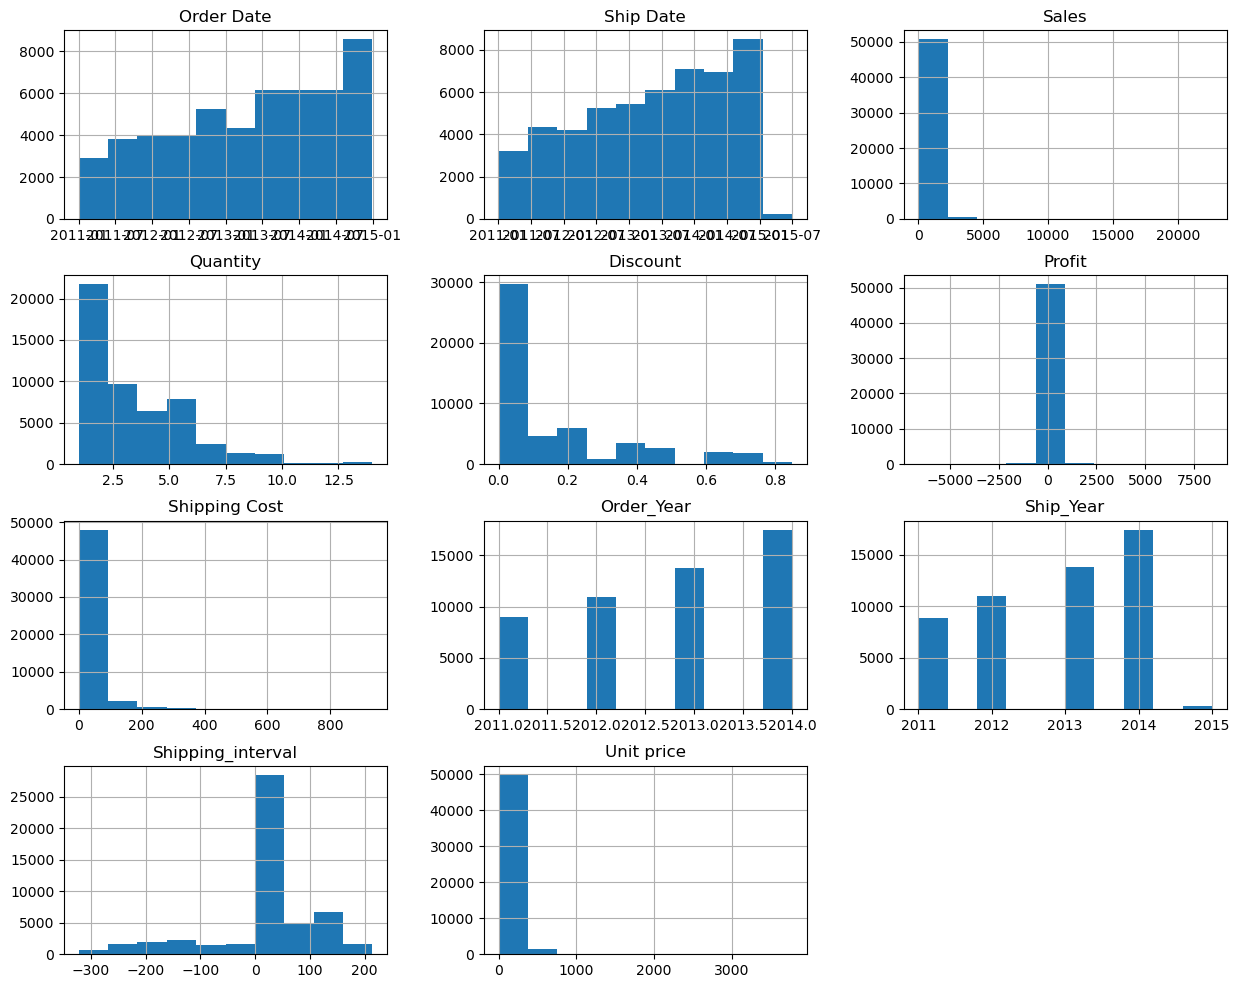

In [37]:
# Check the ditribution of the variables
df.hist(figsize=(15,12));

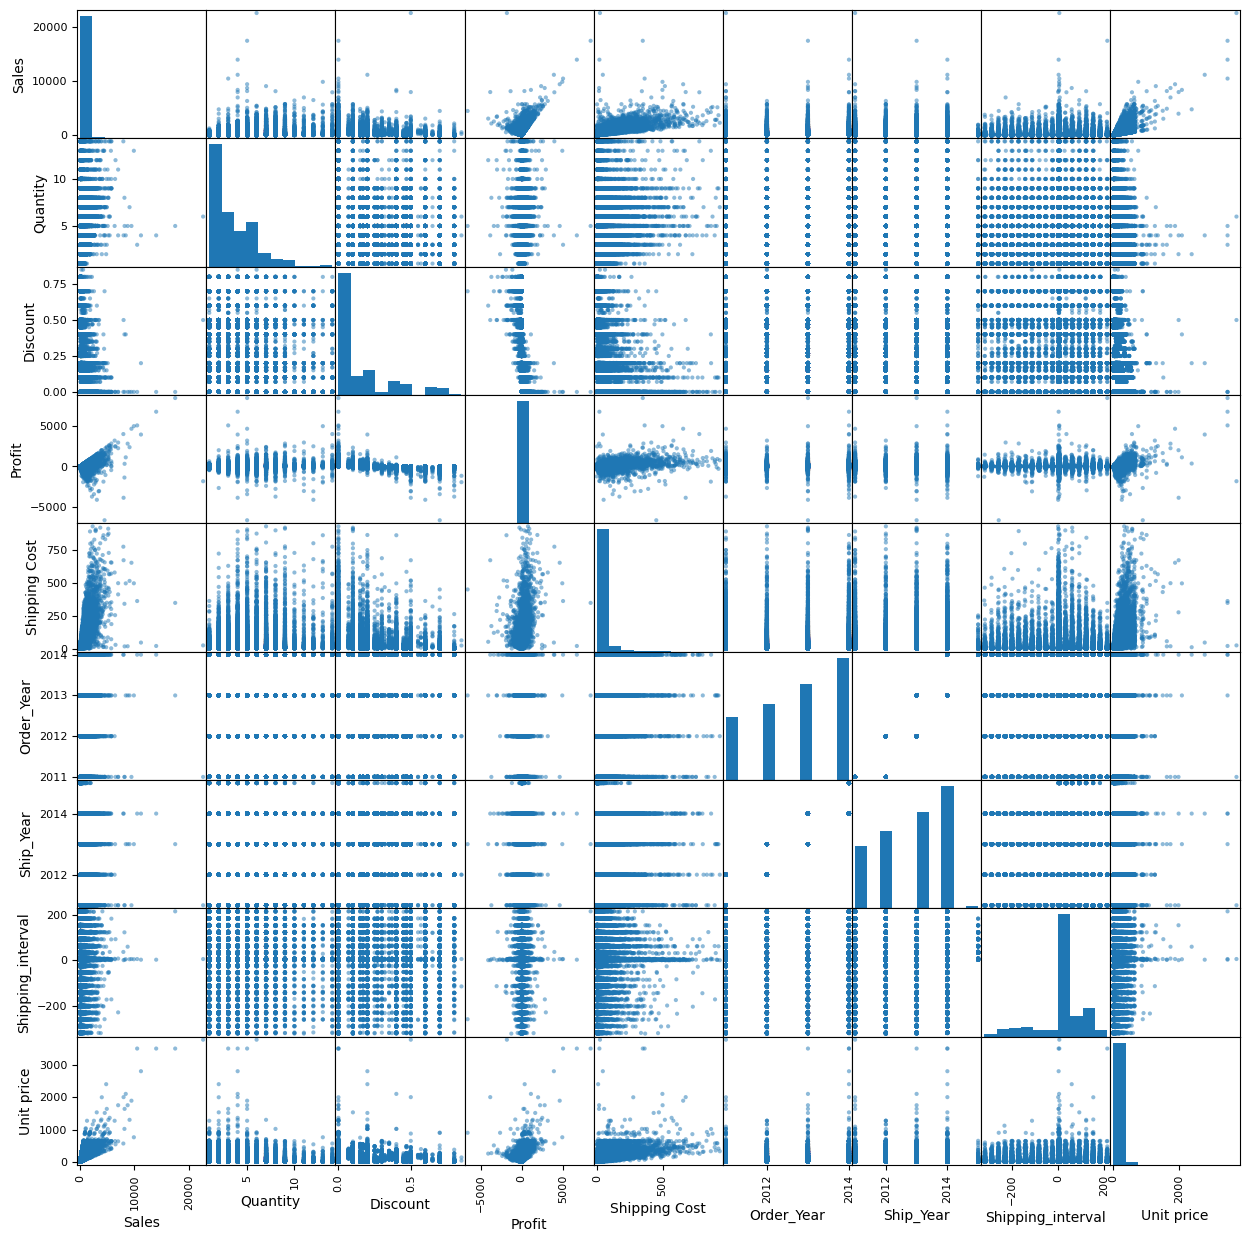

In [38]:
# Check the ditribution of the variables
pd.plotting.scatter_matrix(df, figsize = (15,15));

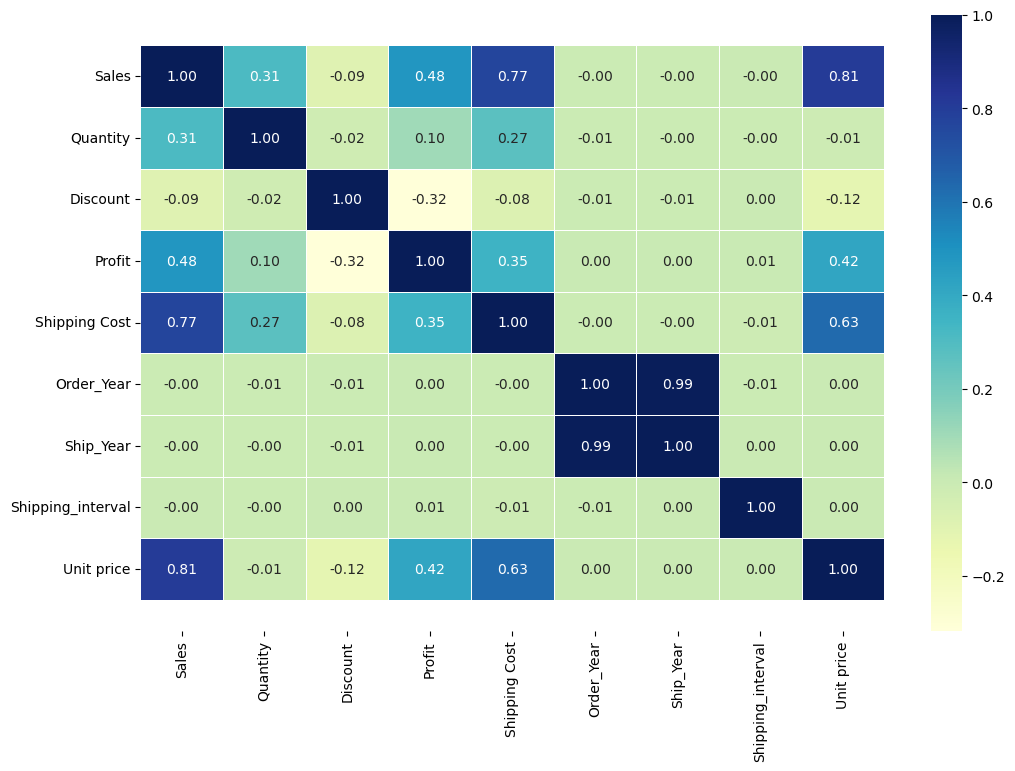

In [39]:
# Visualizing the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# Data Analysis 

# -- What is the sales and profit per market?

In [40]:
# Create a table to display sales and profit per market
sp_market = df.groupby(['Market'])[['Sales', 'Profit']].sum()#.reset_index()
sp_market.round(3)

,Sales,Profit
Market,,
APAC,3585744.129,436000.049
Africa,783773.211,88871.631
Canada,66928.170,17817.390
EMEA,806161.311,43897.971
EU,2938089.062,372829.742
LATAM,2164605.167,221643.487
US,2297200.860,286397.022


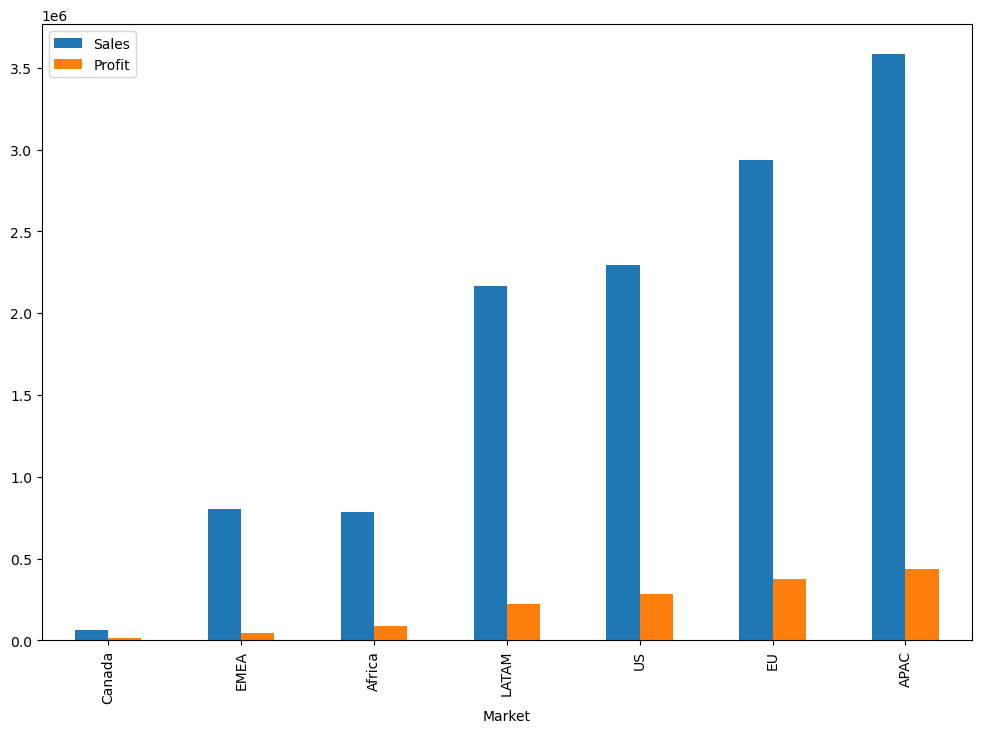

In [41]:

#Add title and others
#style.use("seaborn")
#sp_market.plot(kind="bar")
#plt.title("Sales and Profit per Market",fontsize = 20)

sp_market = df.groupby('Market')[["Sales", "Profit"]].sum()
sort_profit2 = sp_market.sort_values("Profit", ascending=True)
sort_profit2.plot(kind="bar", figsize=(12,8))
plt.show()

# What is the most profitable market and least profitable market?

In [42]:
profit_market = df.groupby(['Market'])[['Profit']].sum().sort_values(by='Profit', ascending=False)
profit_market

,Profit
Market,
APAC,436000.04900
EU,372829.74150
US,286397.02170
LATAM,221643.48708
Africa,88871.63100
EMEA,43897.97100
Canada,17817.39000


Text(0.5, 1.0, 'Profit per Market')

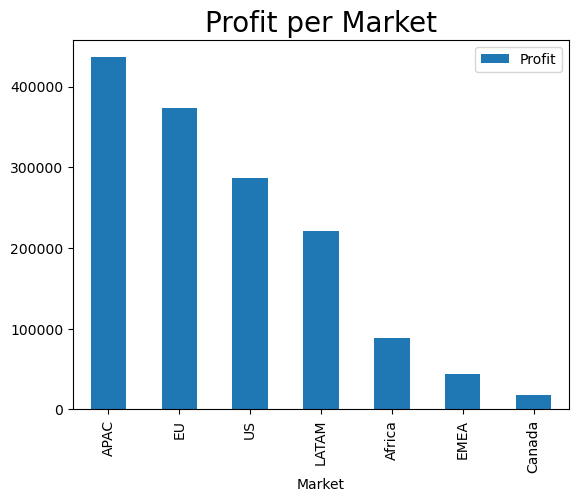

In [43]:
profit_market.plot(kind="bar")
plt.title("Profit per Market",fontsize = 20)

In [44]:
Most_profit_market = profit_market.loc[profit_market["Profit"]==profit_market["Profit"].max()]
Most_profit_market

,Profit
Market,
APAC,436000.049


In [45]:
least_profit_market = profit_market.loc[profit_market["Profit"]==profit_market["Profit"].min()]
least_profit_market

,Profit
Market,
Canada,17817.39


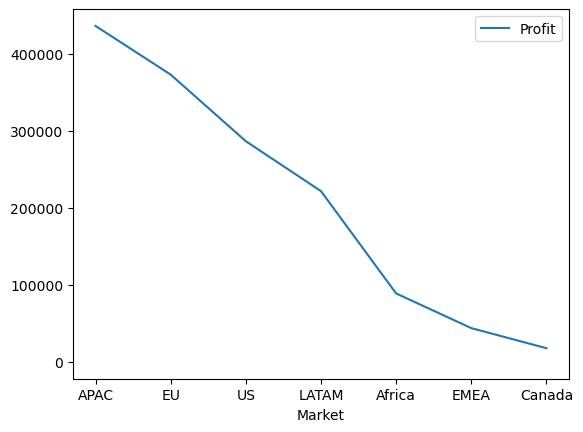

<Figure size 1700x900 with 0 Axes>

In [46]:
#plot a line graph
profit_market.plot(kind="line")
plt.plot(x, color = 'blue', linewidth=4, linestyle='-.')
plt.figure(figsize=(17,9))
plt.show()

## . How are you going to increase the sales for the products that least bought 

In [47]:
#measure the sales of product interm of quantity 
products_brought = pd.DataFrame(df.groupby("Product Name")["Unit price",'Market',"Shipping Cost","Discount","Quantity"].sum().nlargest(15,columns = "Quantity"))

products_brought

,Unit price,Shipping Cost,Discount,Quantity
Product Name,,,,
Staples,2011.7060,731.43,21.20,876
"Cardinal Index Tab, Clear",529.6778,208.35,10.32,337
"Eldon File Cart, Single Width",9892.2816,3970.85,8.82,321
"Rogers File Cart, Single Width",8861.2742,3136.28,16.26,262
"Sanford Pencil Sharpener, Water Color",1800.7906,570.38,10.66,259
"Stockwell Paper Clips, Assorted Sizes",609.7621,269.20,9.86,253
"Avery Index Tab, Clear",369.2813,140.52,9.01,252
"Ibico Index Tab, Clear",593.4357,193.26,10.71,251
"Smead File Cart, Single Width",7650.5247,3036.45,13.06,250


In [48]:
products_brought["average_discount"] = products_brought["Discount"]/products_brought["Quantity"]
products_brought["average_shippingcost"] = products_brought["Shipping Cost"]/products_brought["Quantity"]
products_brought["average_unitprice"] = products_brought["Unit price"]/products_brought["Quantity"]

products_brought

,Unit price,Shipping Cost,Discount,Quantity,average_discount,average_shippingcost,average_unitprice
Product Name,,,,,,,
Staples,2011.7060,731.43,21.20,876,0.024201,0.834966,2.296468
"Cardinal Index Tab, Clear",529.6778,208.35,10.32,337,0.030623,0.618249,1.571744
"Eldon File Cart, Single Width",9892.2816,3970.85,8.82,321,0.027477,12.370249,30.817077
"Rogers File Cart, Single Width",8861.2742,3136.28,16.26,262,0.062061,11.970534,33.821657
"Sanford Pencil Sharpener, Water Color",1800.7906,570.38,10.66,259,0.041158,2.202239,6.952859
"Stockwell Paper Clips, Assorted Sizes",609.7621,269.20,9.86,253,0.038972,1.064032,2.410127
"Avery Index Tab, Clear",369.2813,140.52,9.01,252,0.035754,0.557619,1.465402
"Ibico Index Tab, Clear",593.4357,193.26,10.71,251,0.042669,0.769960,2.364286
"Smead File Cart, Single Width",7650.5247,3036.45,13.06,250,0.052240,12.145800,30.602099


In [49]:
#print the least sold products
poor_products = pd.DataFrame(df.groupby("Product Name")["Quantity","Unit price","Shipping Cost","Discount",].sum().nsmallest(15,columns="Quantity"))

poor_products

,Quantity,Unit price,Shipping Cost,Discount
Product Name,,,,
Boston 1900 Electric Pencil Sharpener,1,14.980,2.08,0.00
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,119.833,13.47,0.15
"Chromcraft Training Table, Adjustable Height",1,38.144,1.53,0.80
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,207.184,26.94,0.20
Penpower WorldCard Pro Card Scanner,1,91.475,10.93,0.50
Xerox 20,1,6.480,0.61,0.00
Avery 5,2,2.880,1.10,0.00
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,3.850,0.61,0.00
"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",2,68.232,29.02,0.20


In [50]:
#add extra features like average discount, avg shipping cost, avg unit price on every prduct sold
poor_products["average_discount"] = poor_products["Discount"]/poor_products["Quantity"]
poor_products["average_shippingcost"] = poor_products["Shipping Cost"]/poor_products["Quantity"]
poor_products["average_unitprice"] = poor_products["Unit price"]/poor_products["Quantity"]


poor_products

,Quantity,Unit price,Shipping Cost,Discount,average_discount,average_shippingcost,average_unitprice
Product Name,,,,,,,
Boston 1900 Electric Pencil Sharpener,1,14.980,2.08,0.00,0.00,2.080,14.9800
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,119.833,13.47,0.15,0.15,13.470,119.8330
"Chromcraft Training Table, Adjustable Height",1,38.144,1.53,0.80,0.80,1.530,38.1440
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,207.184,26.94,0.20,0.20,26.940,207.1840
Penpower WorldCard Pro Card Scanner,1,91.475,10.93,0.50,0.50,10.930,91.4750
Xerox 20,1,6.480,0.61,0.00,0.00,0.610,6.4800
Avery 5,2,2.880,1.10,0.00,0.00,0.550,1.4400
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,3.850,0.61,0.00,0.00,0.305,1.9250
"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",2,68.232,29.02,0.20,0.10,14.510,34.1160


<AxesSubplot:xlabel='Product Name'>

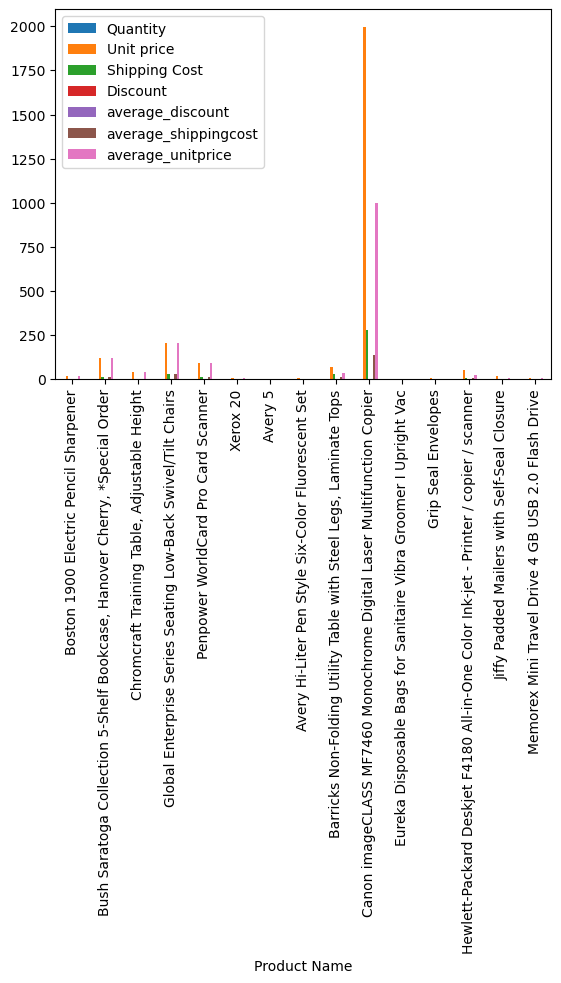

In [51]:
#Top_products.plot(kind="bar",
print("\n")
poor_products.plot(kind="bar")
#poor_products.plot(kind="bar", x="Quantity")
#plt.title("Least 10 sold Products",fontsize = 20);

## Which month does the company records more sales?

In [52]:
month_sales = df.groupby(['Order_Month'])[['Sales']].sum().sort_values(by='Sales', ascending=False).reset_index()
month_sales.round(3)

,Order_Month,Sales
0,Dec,1383335.107
1,Nov,1377651.291
2,Aug,1247500.805
3,Sep,1244139.726
4,Jun,1152367.788
5,Oct,1120777.468
6,May,976415.681
7,Mar,951333.085
8,Apr,851617.321
9,Jul,838743.556


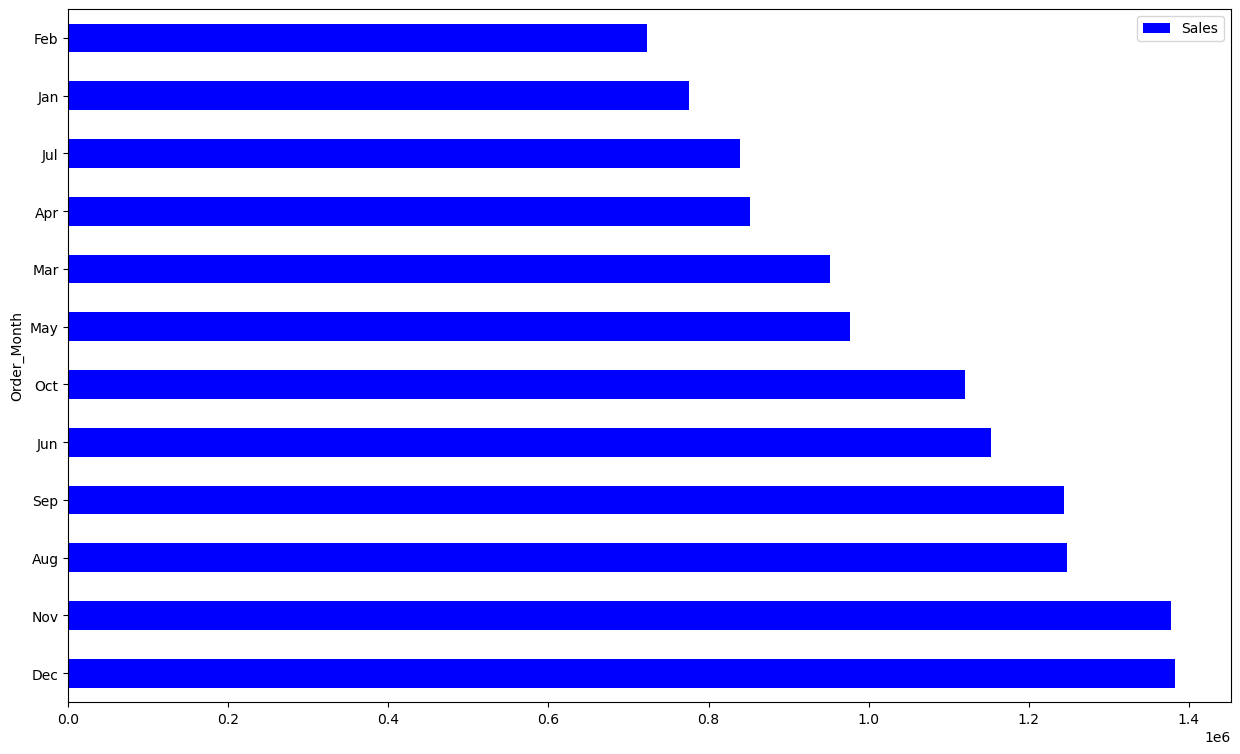

In [54]:
month_sales.plot.barh(x='Order_Month', y='Sales', color='blue', figsize=(15,9));

#From the graph below, we could see that the 12th Month (December) has the highest sale

# . What is the correlation between discount and sale?

In [55]:
corr_sales_discount = df["Discount"].corr(df["Sales"])#correlation between sales and discount
print(f"The correlation between Discount and Sales is {round(corr_sales_discount,2)}")


#The correlation coefficient between Discount and Sales indicates a very weak one

The correlation between Discount and Sales is -0.09


In [56]:
# correlation table
df_discount_sale = df[['Discount', 'Sales']].copy()
print(df_discount_sale.corr())

          Discount     Sales
Discount  1.000000 -0.086722
Sales    -0.086722  1.000000


In [57]:
#corr_sales_discount = df[["Sales","Discount","Quantity"]].copy()
#mask = np.zeros_like(corr_sales_discount.corr())
#upper_part = np.triu_indices_from(mask)
#mask[upper_part] = 1
#fig = plt.figure(figsize = (10,8))
#plt.title("Relationship between Sales,Discount and Quantity")
#sns.heatmap(corr_sales_discount.corr(),mask=mask, annot =True, annot_kws={"size":14},vmin = 0,vmax = 1)

## Does the shipping cost affect the sales

In [62]:
corr = df['Shipping Cost'].corr(df['Sales'])
print("Correlation between Shipping Cost and sales is: ", round(corr, 2))

# Yes, it can be said that Shipping Cost affect Sales since their correlation coefficient is on the high side

Correlation between Shipping Cost and sales is:  0.77


In [63]:
df_cost_sale = df[['Shipping Cost', 'Sales']].copy()

df_cost_sale.corr()

,Shipping Cost,Sales
Shipping Cost,1.000000,0.768073
Sales,0.768073,1.000000


## City with most orders for a given product category

In [64]:
Order_city = pd.DataFrame(df.groupby(["Category","City"])["Quantity"].sum())
Order_city.reset_index(inplace=True)

Order_city

,Category,City,Quantity
0,Furniture,Aachen,10
1,Furniture,Aalen,3
2,Furniture,Aalst,4
3,Furniture,Aba,4
4,Furniture,Abadan,8
...,...,...,...
8074,Technology,Ziguinchor,1
8075,Technology,Zinder,4
8076,Technology,Zlatoust,5
8077,Technology,Zunyi,6


In [65]:
##generating top 10 cities for differnt categories
#furniture_category
Cat_furniture = Order_city.loc[Order_city["Category"]=="Furniture"]
Ten_furniture_City = Cat_furniture.nlargest(10,columns = "Quantity")
Ten_furniture_City

,Category,City,Quantity
1480,Furniture,New York City,720
1221,Furniture,Los Angeles,588
1616,Furniture,Philadelphia,449
1281,Furniture,Manila,441
1892,Furniture,Santo Domingo,417
1839,Furniture,San Francisco,399
1906,Furniture,Seattle,370
1358,Furniture,Mexico City,301
2061,Furniture,Tegucigalpa,301
898,Furniture,Houston,291


<AxesSubplot:title={'center':'Top cities with most order in Furniture Category'}, xlabel='City'>

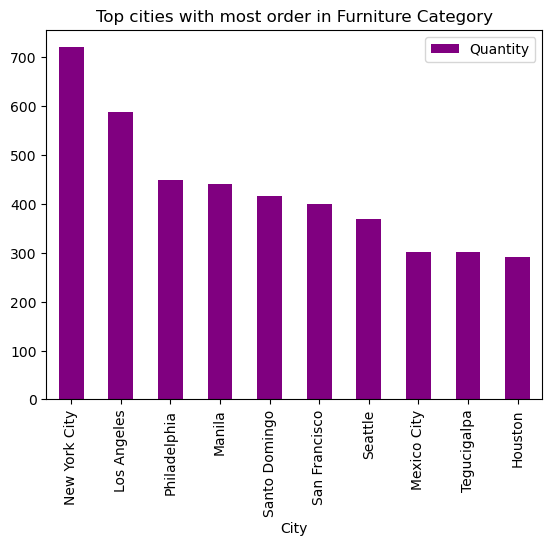

In [66]:
#plotting a graph to visualize it
Ten_furniture_City.plot(kind="bar",x="City",y="Quantity",color= "purple",title="Top cities with most order in Furniture Category")

In [67]:
#generating top cities for supplies category
Cat_Office_Supplies = Order_city.loc[Order_city["Category"]=="Office Supplies"]
Cat_Office_Supplies.sort_values(by = "Quantity",ascending = False,inplace = True)
Ten_Office_Supplies_City = Cat_Office_Supplies.nlargest(10,columns = "Quantity")
Ten_Office_Supplies_City

,Category,City,Quantity
4441,Office Supplies,New York City,2065
4086,Office Supplies,Los Angeles,1688
4947,Office Supplies,San Francisco,1220
4634,Office Supplies,Philadelphia,1127
5034,Office Supplies,Seattle,928
3618,Office Supplies,Houston,924
5007,Office Supplies,Santo Domingo,897
4163,Office Supplies,Manila,813
5257,Office Supplies,Tegucigalpa,792
4157,Office Supplies,Managua,719


<AxesSubplot:title={'center':'Top cities with most order in Office supplies Category'}, xlabel='City'>

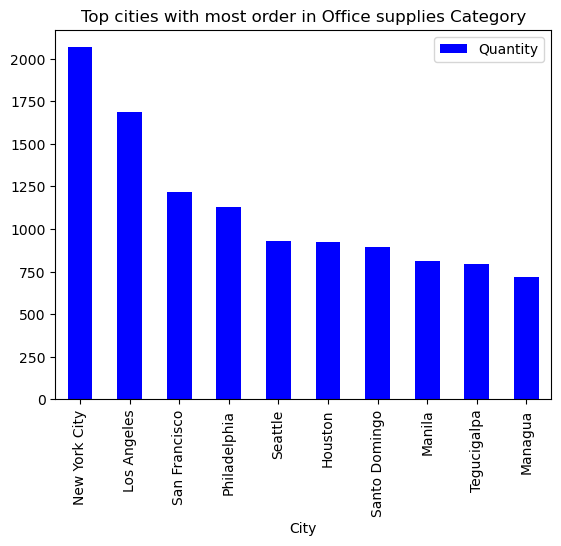

In [68]:
#plotting a graph to visualize it
Ten_Office_Supplies_City.plot(kind="bar",x="City",y="Quantity",color= "blue",title="Top cities with most order in Office supplies Category")

In [69]:
#generating top cities for technology category
Cat_Technology = Order_city.loc[Order_city["Category"]=="Technology"]
Cat_Technology.sort_values(by = "Quantity",ascending = False,inplace = True)
Ten_Technology_City = Cat_Technology.nlargest(10,columns = "Quantity")
Ten_Technology_City

,Category,City,Quantity
7204,Technology,New York City,632
6931,Technology,Los Angeles,603
6998,Technology,Manila,407
7337,Technology,Philadelphia,405
7612,Technology,Santo Domingo,335
7564,Technology,San Francisco,316
7631,Technology,Seattle,292
6992,Technology,Managua,252
6607,Technology,Houston,251
7733,Technology,Sydney,251


<AxesSubplot:title={'center':'Top cities with most order in Technology Category'}, xlabel='City'>

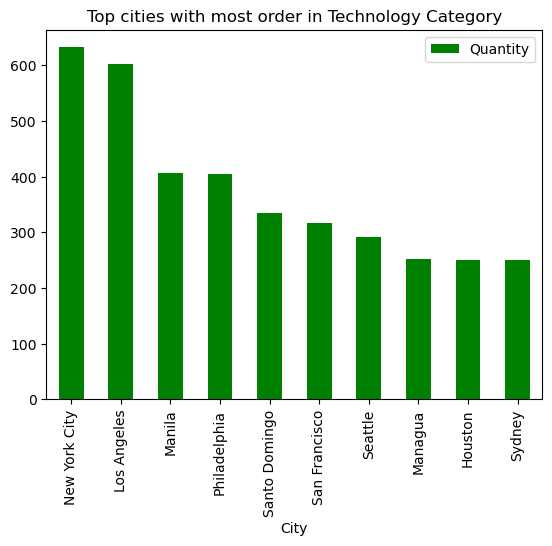

In [70]:
#plotting a graph to visualize it
Ten_Technology_City.plot(kind="bar",x="City",y="Quantity",color= "green",title="Top cities with most order in Technology Category")

In [71]:
# Therefore the city making the most oder is 

city_records = df.loc[:, ['City', 'Category', 'Sales']].groupby(['City', 'Category']).sum().sort_values(by="Sales", ascending=False)

city_records.head(10)

Sales
City          Category                    
New York City Technology       109316.1060
              Furniture         75691.0490
Los Angeles   Technology        73029.7860
New York City Office Supplies   71361.0060
Los Angeles   Furniture         54000.0410
Manila        Furniture         49773.1680
Los Angeles   Office Supplies   48821.5140
Manila        Technology        46723.4535
Sydney        Furniture         45426.5790
Seattle       Technology        42506.3720

## which products are making loss

In [72]:
loss_product = pd.DataFrame(df.groupby(["Product Name"])["Profit"].sum().nsmallest(10)).reset_index()
loss_product.sort_values(by = "Profit",ascending = True,inplace = True)
loss_product

,Product Name,Profit
0,Cubify CubeX 3D Printer Double Head Print,-8879.9704
1,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
2,"Motorola Smart Phone, Cordless",-4447.0380
3,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
4,"Bevis Round Table, Adjustable Height",-3649.8940
5,"Bevis Computer Table, Fully Assembled",-3509.5638
6,"Rogers Lockers, Blue",-2893.4908
7,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156
8,"Bevis Wood Table, with Bottom Storage",-2782.5880
9,"Lesro Training Table, Rectangular",-2581.2834


<AxesSubplot:title={'center':'Products that are performing badly'}, xlabel='Product Name'>

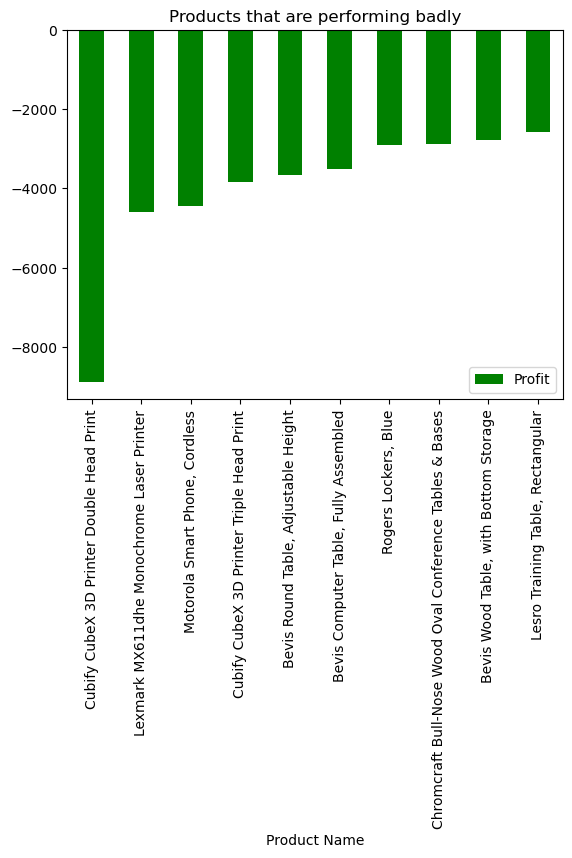

In [73]:

loss_product.plot(kind="bar",x="Product Name",y="Profit",color= "green", title="Products that are performing badly")

## Which segment provides more profit

In [74]:
#group profit by segment
profit_segment = df.groupby(["Segment"])["Profit"].sum().reset_index()
profit_segment

,Segment,Profit
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277009.18056


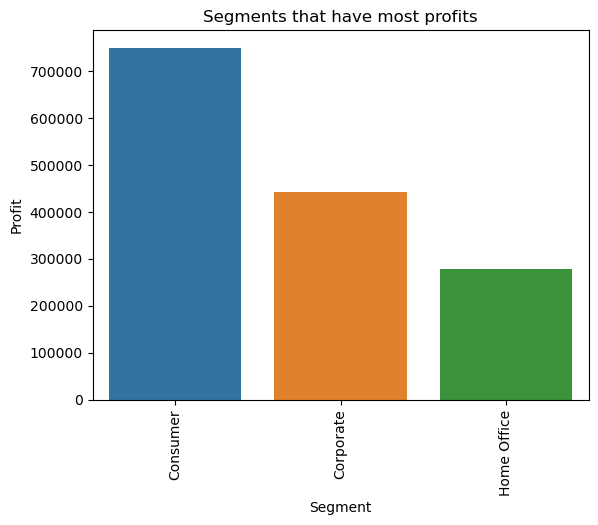

In [75]:
sns.barplot(x='Segment',y='Profit',data=profit_segment.reset_index()).set(title = "Segments that have most profits")
plt.xticks(rotation = 'vertical');

## Which order priority yields more sales

In [76]:
#group  sum of sales by order piority
Order_piority = df.groupby(["Order Priority"])["Sales"].sum().reset_index()
Order_piority.sort_values(by="Sales", inplace=True, ascending = True)

Order_piority.round(3)

,Order Priority,Sales
2,Low,567825.928
0,Critical,986235.464
1,High,3807548.144
3,Medium,7280892.374


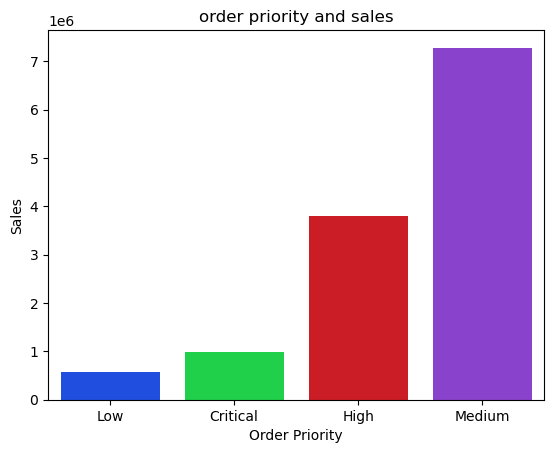

In [77]:
style.use("seaborn-bright")
sns.barplot(x='Order Priority',y='Sales',data=Order_piority).set(title = "order priority and sales");

# Most Profitable Category

In [78]:
profitable_category = pd.DataFrame(df.groupby(['Category']).sum()['Profit'])
profitable_category.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_category

,Profit
Category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,285204.72380


# what it the correlation between shipping cost and profit?

In [79]:
# what it the correlation between shipping cost and profit?
correlation = df[["Shipping Cost", "Profit"]].corr()
print(correlation)

               Shipping Cost    Profit
Shipping Cost       1.000000  0.354441
Profit              0.354441  1.000000


Text(0.5, 1.0, 'Correlation between Shipping Cost and Profit')

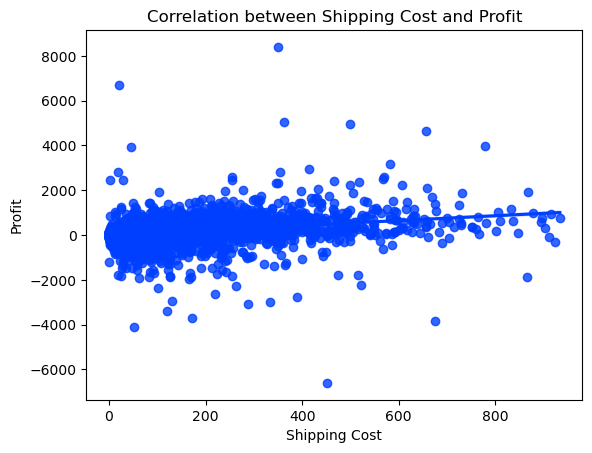

In [80]:
# what it the correlation between shipping cost and profit?
sns.regplot(x=df['Shipping Cost'], y=df['Profit'])
plt.title('Correlation between Shipping Cost and Profit')

# What is the average shipping cost to each region

In [81]:
#group shipping cost by region and find the mean for each region
Average_shipping_cost  = df.groupby(["Region"])["Shipping Cost"].mean().reset_index()
Average_shipping_cost.sort_values(by="Shipping Cost",inplace=True)
Average_shipping_cost

,Region,Shipping Cost
5,EMEA,17.573221
0,Africa,19.215058
1,Canada,19.285495
2,Caribbean,21.059260
12,West,23.887687
10,South,25.353509
6,East,25.542001
3,Central,26.710494
7,North,27.476299
11,Southeast Asia,29.937948


Text(0, 0.5, 'Shipping Cost')

<Figure size 1400x1000 with 0 Axes>

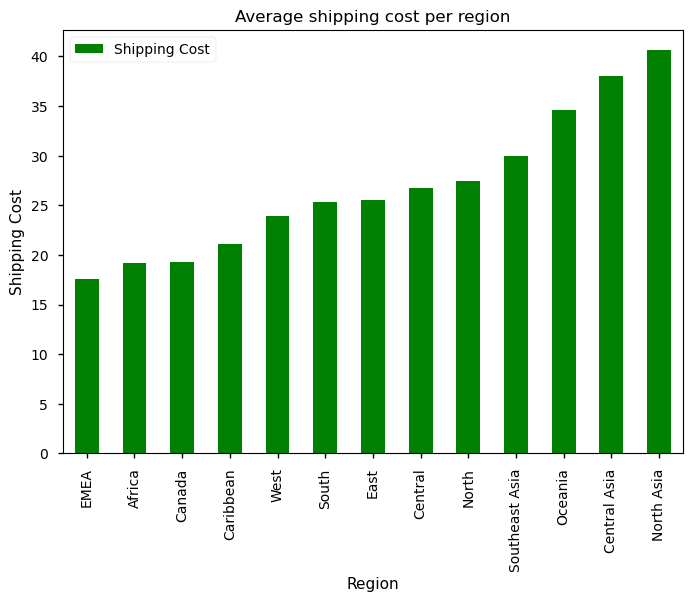

In [82]:
style.use("seaborn-notebook")
plt.figsize=(12,40)
plt.figure(figsize = (14,10))
Average_shipping_cost.plot(kind="bar",x="Region",y='Shipping Cost',color= "green")
plt.title('Average shipping cost per region')
plt.xlabel('Region')
plt.ylabel('Shipping Cost')

## What product category is dominant and should be targetted to the different markets

In [85]:
productCat_Profit= df.groupby(["Category","Market"])["Profit"].sum()
productCat_Profit

Category         Market
Furniture        APAC      125896.15050
                 Africa     16262.08500
                 Canada      2613.24000
                 EMEA       11534.13600
                 EU         68850.13950
                 LATAM      41597.70000
                 US         18451.27280
Office Supplies  APAC      105510.04250
                 Africa     28480.05300
                 Canada      7957.53000
                 EMEA       14869.39200
                 EU        159706.94400
                 LATAM      79459.07200
                 US        122490.80080
Technology       APAC      204593.85600
                 Africa     44129.49300
                 Canada      7246.62000
                 EMEA       17494.44300
                 EU        144272.65800
                 LATAM     100586.71508
                 US        145454.94810
Name: Profit, dtype: float64

Text(0.5, 0, 'Market')

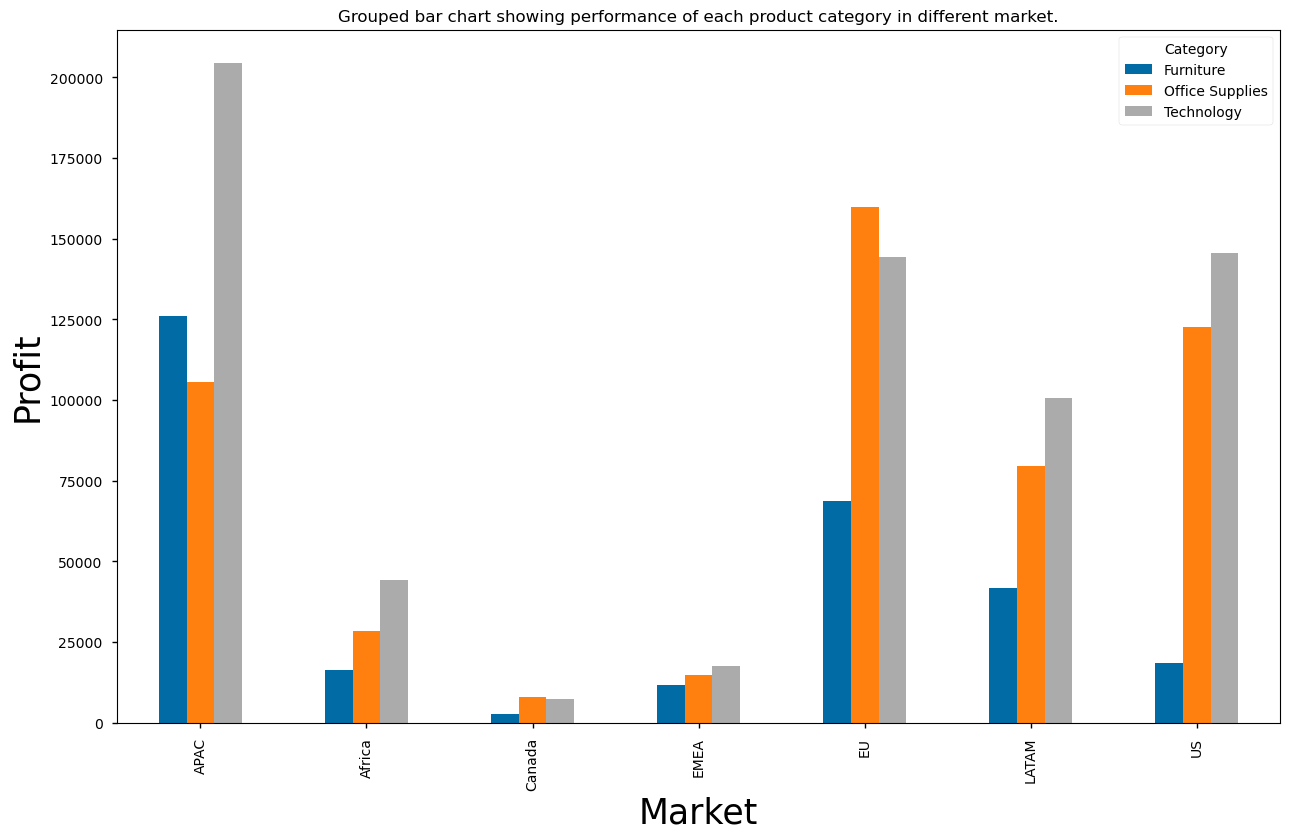

In [86]:
style.use('tableau-colorblind10')
ax = productCat_Profit.unstack(0).plot(kind="bar",figsize=(15,9))#ploting the group bar chart
ax.set(title='Grouped bar chart showing performance of each product category in different market.')
ax.set_ylabel("Profit", fontsize = 25)
ax.set_xlabel("Market", fontsize = 25)

The sales of Technology has been the highest so far in all Market Region.
We could need to find out why Office Supplies generate the lowest Sales across the Market

# Does the interval between the order date and the shipping date affect sale and profit

In [87]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Year,Order_Month,Ship_Year,Ship_Month,Shipping_interval,Unit price
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,2011,Jan,2011,Jun,151,204.15


In [88]:
# Shipping interval and sales
correlation = df[["Shipping_interval", "Sales"]].corr()
print(correlation)

                   Shipping_interval    Sales
Shipping_interval            1.00000 -0.00121
Sales                       -0.00121  1.00000


Text(0.5, 1.0, 'Correlation between Shipping interval and Sales')

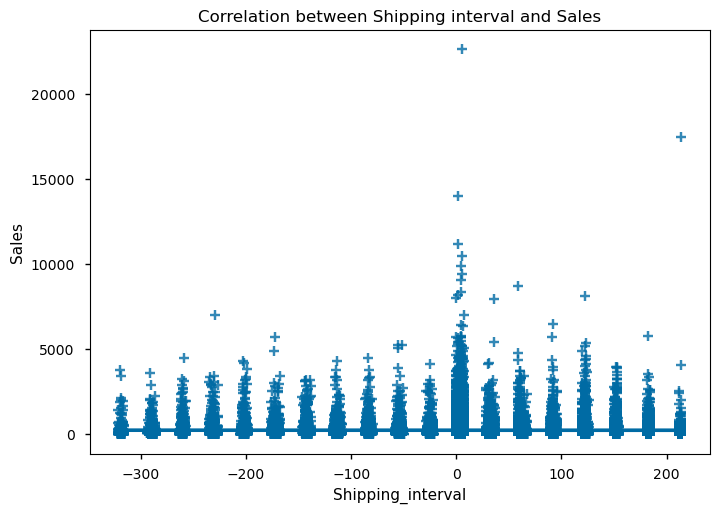

In [89]:
sns.regplot(x=df['Shipping_interval'], y=df['Sales'], marker="+")
plt.title('Correlation between Shipping interval and Sales')

In [90]:
# Shipping interval and profit
correlation = df[["Shipping_interval", "Profit"]].corr()
print(correlation)

                   Shipping_interval    Profit
Shipping_interval           1.000000  0.007117
Profit                      0.007117  1.000000


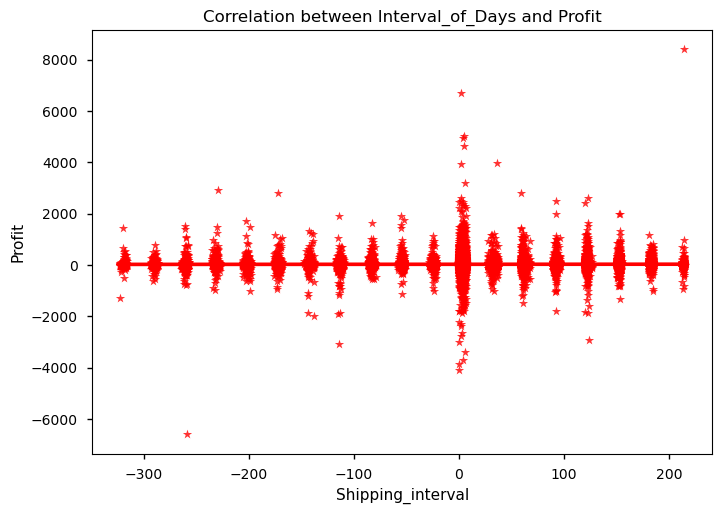

In [92]:
sns.regplot(x=df['Shipping_interval'], y=df['Profit'], color='red', marker="*")
plt.title('Correlation between Interval_of_Days and Profit');

# Which are the Top 10 country by sales

In [93]:
countries = pd.DataFrame(df.groupby('Country').sum()['Sales'])
countries.sort_values('Sales',inplace=True, ascending=False)
countries.head(10).round(3)

,Sales
Country,
United States,2297200.860
Australia,925235.853
France,858931.083
China,700562.025
Germany,628840.030
Mexico,622590.618
India,589650.105
United Kingdom,528576.300
Indonesia,404887.498


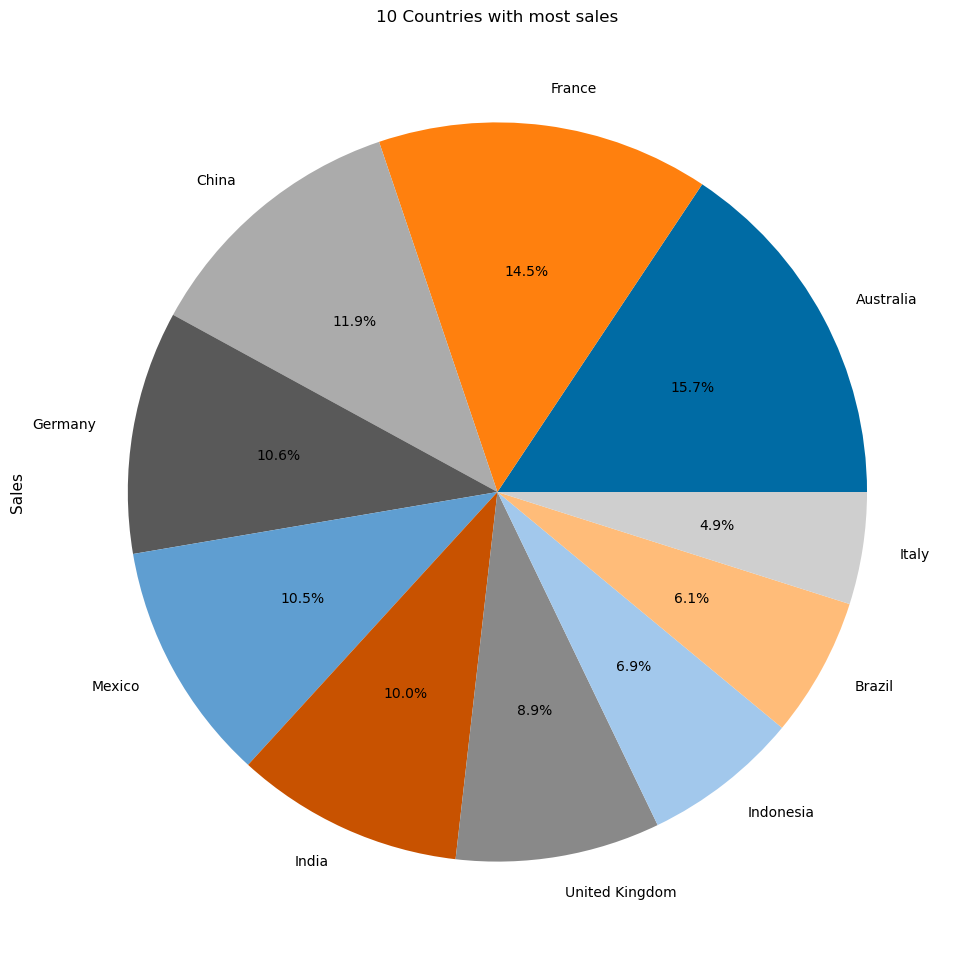

In [94]:
countries = countries.sort_values(by = 'Sales',ascending = False)[1:11]
countries['Sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(20,12))
plt.title('10 Countries with most sales')
plt.show()

# what is the trend of sales for the years (order of years 2011 - 2014

Total sales chart by each year

In [95]:
years_sales = df.groupby(['Order_Year','Order_Month']).sum()
years_sales

Sales  Quantity  Discount       Profit  \
Order_Year Order_Month                                                  
2011       Apr          128833.47034      2181    86.630  13405.46924   
           Aug          219223.49524      2909   128.130  19650.67124   
           Dec          292359.96752      4023   178.092  33006.85862   
           Feb          134969.94086      1794    78.516  17588.83726   
           Jan          138241.30042      2178    97.596  13457.23302   
           Jul          162034.69756      2266    97.140  10631.84406   
           Jun          189338.43966      2715   133.926  25932.87796   
           Mar          171455.59372      2183    90.814  16169.36062   
           May          148146.72092      2057    80.052  14777.45792   
           Nov          214934.29386      3165   138.840  21261.40536   
           Oct          204675.07846      2615    97.464  30745.54166   
           Sep          255237.89698      3357   126.194  32313.25458   
2012       Apr          187469.96192      2506    97.904  20804.00532   
           Aug          271669.66086      3451   138.920  36511.44996   
           Dec          291972.33306      4022   154.580  31968.30416   
           Feb          152661.15144      2156    98.642  17828.18244   
           Jan          162800.89338      2150    84.290  19627.42058   
           Jul          174394.02808      2551   108.790  21725.18808   
           Jun          249289.77172      3508   145.498  34358.03962   
           Mar          201608.72784      2880   122.492  22752.87684   
           May          218960.16042      3239   140.848  22865.39572   
           Nov          270723.05356      4497   182.176  26160.60686   
           Oct          239321.09904      3399   119.942  27773.87454   
           Sep          256567.85308      3752   154.692  25039.93498   
2013       Apr          233181.34844      3161   127.946  26008.05144   
           Aug          323876.60716      4564   185.740  32977.75576   
           Dec          371245.40880      5005   205.932  47654.27990   
           Feb          191062.77216      2535   101.234  31553.99756   
           Jan          206459.19582      2766   110.106  26052.40252   
           Jul          223642.65664      3594   141.910  27019.91294   
           Jun          341162.34370      4948   192.106  43298.85000   
           Mar          230547.79468      3130   136.134  34873.71938   
           May          304509.96336      4115   159.898  39053.30946   
           Nov          383039.21248      5274   190.164  51720.88568   
           Oct          270121.87570      3977   163.606  27871.97470   
           Sep          326897.27044      5067   220.746  18850.09084   
2014       Apr          302132.54000      4397   194.276  35709.53320   
           Aug          432731.04194      5506   223.994  46443.47934   
           Dec          427757.39800      6307   280.088  48920.76000   
           Feb          244159.30486      3450   133.726  29454.01876   
           Jan          268265.52240      3656   153.674  31447.74660   
           Jul          278672.17326      3867   165.000  26450.70856   
           Jun          372577.23298      5528   220.046  40869.02108   
           Mar          347720.96868      4820   191.644  50097.04458   
           May          304798.83604      4415   175.984  34335.60404   
           Nov          508954.73156      7020   293.400  55561.72406   
           Oct          406659.41500      5915   245.664  52342.49740   
           Sep          405436.70584      5741   234.542  52533.83284   

                        Shipping Cost  Ship_Year  Shipping_interval  \
Order_Year Order_Month                                                
2011       Apr               14475.01    1228721              29222   
           Aug               21355.71    1640976                136   
           Dec               32361.86    2288687             -23953   
           Feb           

In [96]:
General_2011_2014 = pd.DataFrame(df.groupby("Order_Year")["Sales"].sum()).reset_index()
General_2011_2014['Order_Year'] = General_2011_2014['Order_Year'].apply(str)
type(General_2011_2014['Order_Year'][1])
General_2011_2014.round(3)

,Order_Year,Sales
0,2011,2259450.896
1,2012,2677438.694
2,2013,3405746.449
3,2014,4299865.871


<AxesSubplot:title={'center':'Trend of Sales from 2011 to 2014'}, xlabel='Years', ylabel='Sales'>

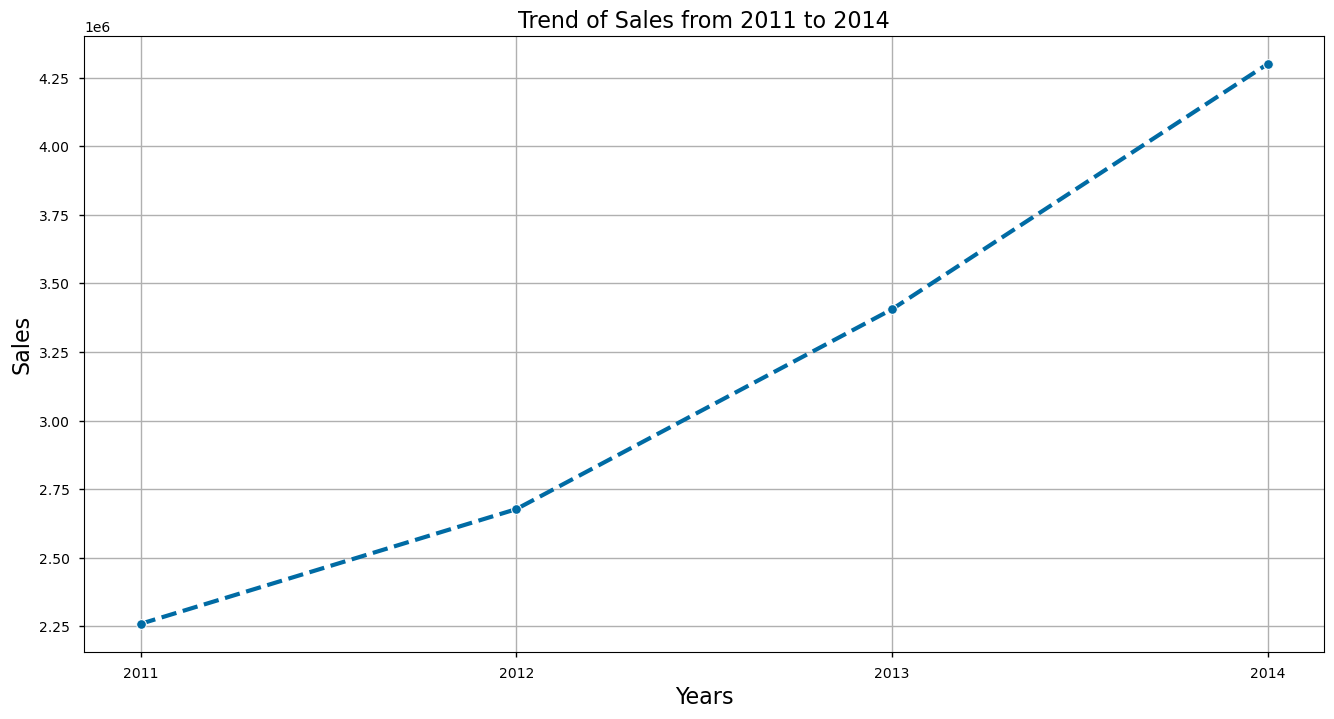

In [97]:
sns.reset_orig
plt.figure(figsize=[16,8])
plt.grid()
plt.title("Trend of Sales from 2011 to 2014", fontsize = 16)
plt.xlabel("Years",fontsize=16)
plt.ylabel("Sales",fontsize=16)
sns.lineplot(x="Order_Year", y="Sales", data=General_2011_2014,lw=3, ls='--', marker='o')

Trend per year

In [98]:
#picking 20ll ordered years
yr_2011_data = pd.DataFrame(df.loc[df["Order_Year"] == 2011])

#Generating Sales of 201l
trend_201l = pd.DataFrame(yr_2011_data.groupby("Order_Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_201l["Order_Month"] = pd.to_datetime(trend_201l["Order_Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_201l = trend_201l.sort_values(by="Order_Month")
trend_201l


,Order_Month,Sales
4,1,138241.30042
3,2,134969.94086
7,3,171455.59372
0,4,128833.47034
8,5,148146.72092
6,6,189338.43966
5,7,162034.69756
1,8,219223.49524
11,9,255237.89698
10,10,204675.07846


In [99]:
#Generating Sales of 2012
#picking 2012 ordered years
yr_2012_data = pd.DataFrame(df.loc[df["Order_Year"] == 2012])
trend_2012 = pd.DataFrame(yr_2012_data.groupby("Order_Month")["Sales"].sum()).reset_index()

#convert ordered month back from month abrv in string to date.time month
trend_2012["Order_Month"] = pd.to_datetime(trend_2012["Order_Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2012 = trend_2012.sort_values(by="Order_Month")
trend_2012

,Order_Month,Sales
4,1,162800.89338
3,2,152661.15144
7,3,201608.72784
0,4,187469.96192
8,5,218960.16042
6,6,249289.77172
5,7,174394.02808
1,8,271669.66086
11,9,256567.85308
10,10,239321.09904


In [100]:
#Generating Sales of 2013
#picking 20l3 ordered years
yr_2013_data = pd.DataFrame(df.loc[df["Order_Year"] == 2013])
trend_2013 = pd.DataFrame(yr_2013_data.groupby("Order_Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_2013["Order_Month"] = pd.to_datetime(trend_2013["Order_Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2013 = trend_2013.sort_values(by="Order_Month")
trend_2013

,Order_Month,Sales
4,1,206459.19582
3,2,191062.77216
7,3,230547.79468
0,4,233181.34844
8,5,304509.96336
6,6,341162.34370
5,7,223642.65664
1,8,323876.60716
11,9,326897.27044
10,10,270121.87570


In [101]:
#Generating Sales of 2014
#picking 20l2 ordered years
yr_2014_data = pd.DataFrame(df.loc[df["Order_Year"] == 2014])
trend_2014 = pd.DataFrame(yr_2014_data.groupby("Order_Month")["Sales"].sum()).reset_index()

#convert ordered month back from month abrv in string to date.time month
trend_2014["Order_Month"] = pd.to_datetime(trend_2014["Order_Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2014 = trend_2014.sort_values(by="Order_Month")
trend_2014

,Order_Month,Sales
4,1,268265.52240
3,2,244159.30486
7,3,347720.96868
0,4,302132.54000
8,5,304798.83604
6,6,372577.23298
5,7,278672.17326
1,8,432731.04194
11,9,405436.70584
10,10,406659.41500


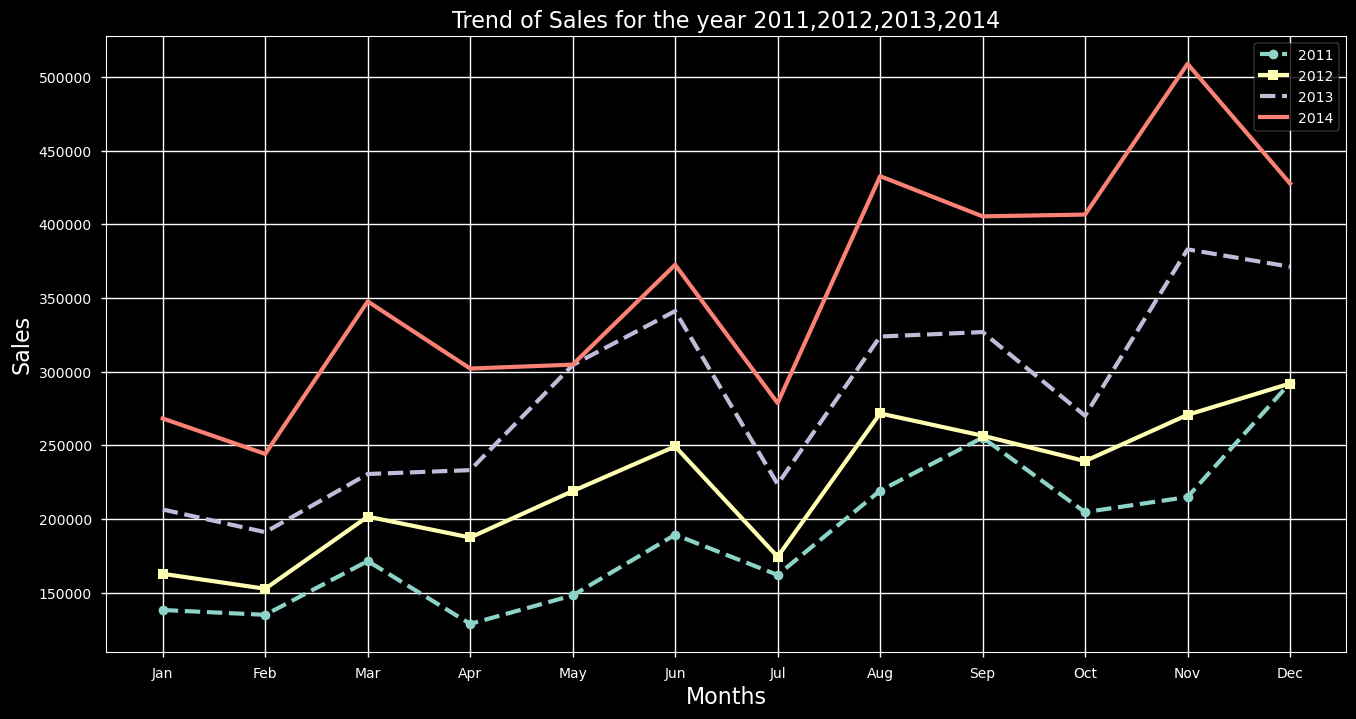

In [102]:
style.use('dark_background')
plt.figure(figsize=[16,8])
plt.grid()
plt.title("Trend of Sales for the year 2011,2012,2013,2014", fontsize = 16)
plt.xlabel("Months",fontsize=16)
plt.ylabel("Sales",fontsize=16)
label = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
x = trend_201l["Order_Month"]
plt.xticks(x,labels=label)
plt.plot(x,trend_201l["Sales"],label ="2011",lw=3,ls='--', marker='o')
plt.plot(x,trend_2012["Sales"],label="2012",lw=3,ls='-', marker='s')
plt.plot(x,trend_2013["Sales"],label="2013",lw=3,ls='--', marker='1')
plt.plot(x,trend_2014["Sales"],label="2014",lw=3,ls='-', marker='+')
plt.legend()
plt.show()

# Conclusion

New York city has the most order for all product category.

There has been a great significant increase of sales in the company over years despite some short comings. 

The company made the most sales between the month of November and December, which could be related to the global holidays and festivity. 

The customer segment made the most profit

There is a positive but low correlation between sales and profit
